### Importar librerias y datos

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_class_weight


import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input
#from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
tensorflow.__version__


from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/JohannaKSV/DeepLearning/main/train_data.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/JohannaKSV/DeepLearning/main/test_data.csv')

#df_train = pd.read_csv('/content/train_data.csv')
#df_test = pd.read_csv('/content/test_data.csv')


In [3]:
df_train.head(5)

,ID,Bankruptcy,Realized.Sales.Gross.Profit.Growth.Rate,Operating.Expense.Rate,Operating.Profit.Per.Share..Yuan...,Gross.Profit.to.Sales,Tax.rate..A.,Current.Liability.to.Liability,Continuous.Net.Profit.Growth.Rate,Long.term.Liability.to.Current.Assets,...,Per.Share.Net.profit.before.tax..Yuan...,Continuous.interest.rate..after.tax.,Liability.Assets.Flag,Working.Capital.to.Total.Assets,Degree.of.Financial.Leverage..DFL.,Operating.Gross.Margin,Contingent.liabilities.Net.worth,Operating.Profit.Growth.Rate,Cash.Flow.to.Liability,Quick.Assets.Total.Assets
0,1,0,0.087661,1.900349e-04,0.131094,0.583345,0.000000,0.815892,0.395719,0.089276,...,0.223720,0.801737,0,0.839112,0.036551,0.591350,0.007401,0.913175,0.489822,0.138714
1,2,0,0.021892,5.371576e-04,0.086167,0.695478,0.209649,0.768636,0.163505,0.000000,...,0.324763,0.791203,0,0.908450,0.126752,0.766066,0.020514,0.849241,0.550247,0.704211
2,3,0,0.102249,2.178329e-04,0.157755,0.766934,0.272061,0.643316,0.181571,0.010180,...,0.360892,0.803126,0,0.865943,0.018152,0.687211,0.004363,0.865814,0.447168,0.398086
3,4,0,0.029972,4.915756e+10,0.249279,0.611580,0.288357,0.752782,0.409196,0.018603,...,0.152445,0.824732,0,0.806254,0.051284,0.715973,0.014162,0.843357,0.485163,0.617386
4,6,0,0.021164,1.206001e-04,0.239817,0.614250,0.000000,0.559498,0.286989,0.148687,...,0.217282,0.787010,0,0.769843,0.012872,0.704043,0.003050,0.884905,0.422001,0.187121


In [5]:
df_train = df_train.drop('ID', axis=1)
df_train.describe()

,Bankruptcy,Realized.Sales.Gross.Profit.Growth.Rate,Operating.Expense.Rate,Operating.Profit.Per.Share..Yuan...,Gross.Profit.to.Sales,Tax.rate..A.,Current.Liability.to.Liability,Continuous.Net.Profit.Growth.Rate,Long.term.Liability.to.Current.Assets,Total.assets.to.GNP.price,...,Per.Share.Net.profit.before.tax..Yuan...,Continuous.interest.rate..after.tax.,Liability.Assets.Flag,Working.Capital.to.Total.Assets,Degree.of.Financial.Leverage..DFL.,Operating.Gross.Margin,Contingent.liabilities.Net.worth,Operating.Profit.Growth.Rate,Cash.Flow.to.Liability,Quick.Assets.Total.Assets
count,2050.000000,2050.000000,2.050000e+03,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2.050000e+03,2.050000e+03,...,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000
mean,0.030244,0.052426,1.143592e+10,0.168423,0.660301,0.149762,0.793474,0.289170,9.294008e+07,1.131508e+06,...,0.253212,0.813889,0.000488,0.841137,0.061406,0.659530,0.020629,0.870736,0.528420,0.462103
std,0.171300,0.037346,6.637064e+10,0.074822,0.065176,0.167852,0.185160,0.086326,1.985623e+09,3.534875e+07,...,0.089347,0.038671,0.022086,0.062363,0.047696,0.064301,0.019282,0.028070,0.084171,0.211477
min,0.000000,0.005576,1.816459e-05,0.026690,0.485416,0.000000,0.019372,0.128763,0.000000e+00,2.043140e-05,...,0.011441,0.733181,0.000000,0.628993,0.000000,0.449928,0.001931,0.808653,0.078139,0.004725
25%,0.000000,0.022660,3.866010e-04,0.107202,0.609787,0.000000,0.679179,0.219818,0.000000e+00,1.941380e-03,...,0.182113,0.783223,0.000000,0.799064,0.027581,0.608820,0.005786,0.848945,0.462781,0.295769
50%,0.000000,0.039844,2.890552e-03,0.153541,0.655394,0.107021,0.844793,0.275462,3.566712e-03,6.752853e-03,...,0.238402,0.812021,0.000000,0.844362,0.046901,0.654584,0.012352,0.869933,0.519719,0.458141
75%,0.000000,0.074134,2.040574e+06,0.219785,0.713574,0.258826,0.948177,0.353458,2.293107e-02,2.145355e-02,...,0.320693,0.845336,0.000000,0.884139,0.084784,0.712043,0.029781,0.893693,0.596492,0.620841
max,1.000000,0.197622,8.153957e+11,0.402487,0.803413,0.966891,1.000000,1.000000,6.747688e+10,1.172719e+09,...,0.761559,0.882713,1.000000,0.987732,1.000000,0.808339,0.096714,0.921276,1.000000,0.989621


In [6]:
scaler = StandardScaler()
X = df_train.drop('Bankruptcy', axis=1)
y = df_train['Bankruptcy']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # abc added stratify
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


#### Plot_history Funcion

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_history(history, model, X_val, y_val):
    """
    Plots training and validation loss, AUC, and the ROC curve.

    Parameters:
        history: Keras History object or dict with keys:
                 'loss', 'val_loss', 'auc', 'val_auc'.
        model: Trained Keras model.
        X_val: Validation features.
        y_val: Validation labels.
    """
    hist = history.history if hasattr(history, 'history') else history

    # Final metrics
    print(f"Train Loss final: {hist['loss'][-1]:.3f}, "
          f"Train AUC final: {hist['auc'][-1]:.3f}")
    print(f"Validation Loss final: {hist['val_loss'][-1]:.3f}, "
          f"Validation AUC final: {hist['val_auc'][-1]:.3f}")

    # ROC curve
    y_pred_proba = model.predict(X_val).ravel()
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Crear figura con 3 subplots
    plt.figure(figsize=(18, 5))

    # Subplot 1: Loss
    plt.subplot(1, 3, 1)
    plt.plot(hist['loss'], label='Training Loss', marker='o')
    plt.plot(hist['val_loss'], label='Validation Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs. Validation Loss')
    plt.legend()
    plt.grid(True)

    # Subplot 2: AUC
    plt.subplot(1, 3, 2)
    plt.plot(hist['auc'], label='Training AUC', marker='o')
    plt.plot(hist['val_auc'], label='Validation AUC', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.title('Training vs. Validation AUC')
    plt.legend()
    plt.grid(True)

    # Subplot 3: ROC
    plt.subplot(1, 3, 3)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


### Modelo

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# Early stopping para evitar overfitting
early_stop = EarlyStopping(monitor='val_auc', patience=5, restore_best_weights=True, mode='max')

# Modelo con L1 y Dropout
def build_model():
    model = Sequential()
    
    # Capa de entrada
    model.add(Dense(64,
                    input_dim=X_train.shape[1],
                    activation='relu',
                    kernel_regularizer=regularizers.l1(0.001)))

    # Capas ocultas con L1 y Dropout
    for _ in range(5):  # Puedes ajustar el número de capas
        model.add(Dense(64,
                        activation='relu',
                        kernel_regularizer=regularizers.l1(0.001)))
        model.add(Dropout(0.3))

    # Capa de salida
    model.add(Dense(1, activation='sigmoid'))

    # Compilar
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', AUC(name='auc')]
    )

    return model

# Crear y entrenar el modelo
model = build_model()
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=2
)


Epoch 1/50


C:\Users\WD\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 - 2s - 41ms/step - accuracy: 0.7195 - auc: 0.5098 - loss: 3.1799 - val_accuracy: 0.8537 - val_auc: 0.6894 - val_loss: 2.9405
Epoch 2/50
52/52 - 0s - 3ms/step - accuracy: 0.3799 - auc: 0.5685 - loss: 2.8708 - val_accuracy: 0.5780 - val_auc: 0.7434 - val_loss: 2.7629
Epoch 3/50
52/52 - 0s - 3ms/step - accuracy: 0.3841 - auc: 0.6118 - loss: 2.6569 - val_accuracy: 0.6049 - val_auc: 0.8216 - val_loss: 2.5665
Epoch 4/50
52/52 - 0s - 3ms/step - accuracy: 0.7738 - auc: 0.7855 - loss: 2.4107 - val_accuracy: 0.7341 - val_auc: 0.8777 - val_loss: 2.2884
Epoch 5/50
52/52 - 0s - 3ms/step - accuracy: 0.7933 - auc: 0.8864 - loss: 2.1734 - val_accuracy: 0.7463 - val_auc: 0.9063 - val_loss: 2.1443
Epoch 6/50
52/52 - 0s - 3ms/step - accuracy: 0.8384 - auc: 0.9324 - loss: 1.9536 - val_accuracy: 0.8415 - val_auc: 0.8989 - val_loss: 1.8630
Epoch 7/50
52/52 - 0s - 3ms/step - accuracy: 0.8732 - auc: 0.9320 - loss: 1.8766 - val_accuracy: 0.8195 - val_auc: 0.9031 - val_loss: 1.8902
Epoch 8/50
52/52 - 0s -

Train Loss final: 1.248, Train AUC final: 0.976
Validation Loss final: 1.307, Validation AUC final: 0.862
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


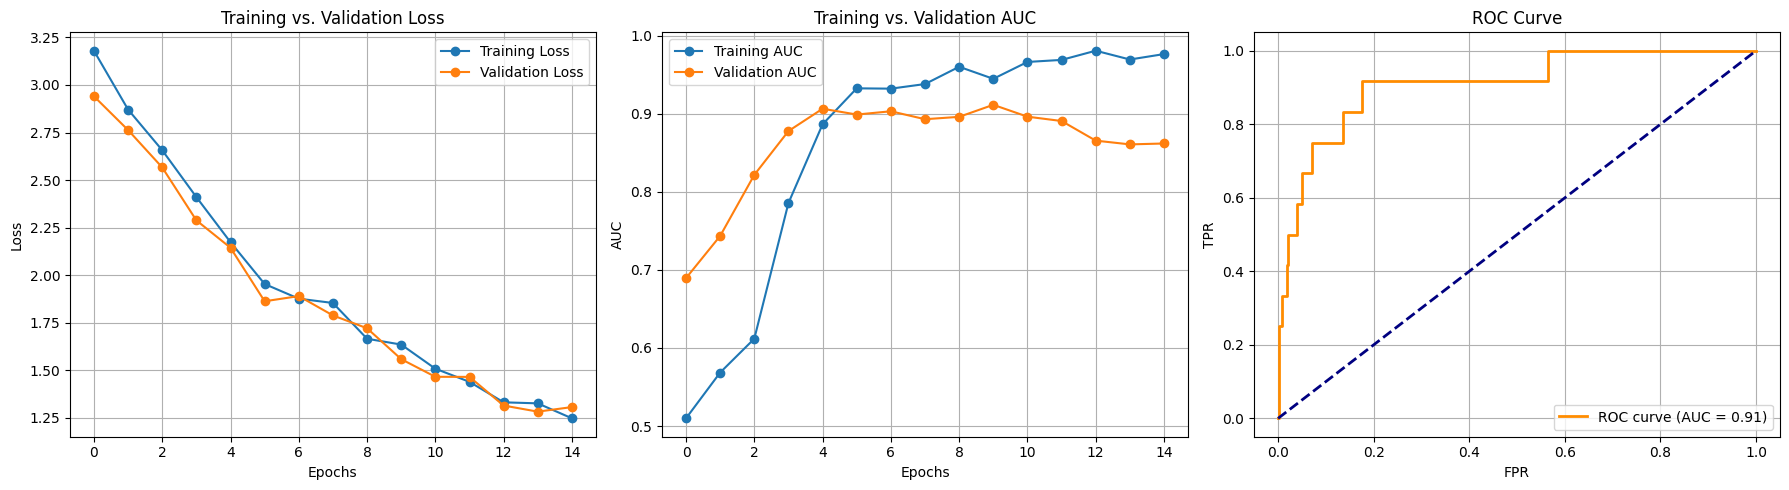

In [18]:
plot_history(history, model, X_val, y_val)

### Exportar Modelo

In [19]:
import os
import pandas as pd

test_data = pd.read_csv('test_data.csv')


def generate_submission(model, test_data, scaler=None, submission_folder='Submissions', model_name='model'):
    """
    Genera el archivo de submission para Kaggle.

    Parámetros:
    - model: el modelo entrenado para hacer las predicciones.
    - test_data: el conjunto de datos de prueba, que debe contener la columna 'ID'.
    - scaler: opcionalmente, el escalador (por ejemplo, un StandardScaler) si los datos fueron escalados.
    - submission_folder: carpeta donde se guardará el archivo de submission.
    - model_name: nombre personalizado del modelo para el archivo de submission.
    """
    
    # Verificar si la carpeta de submissions existe, si no, crearla
    if not os.path.exists(submission_folder):
        os.makedirs(submission_folder)
    
    # Separar las características del conjunto de prueba (eliminando la columna 'ID')
    X_test = test_data.drop('ID', axis=1)
    
    # Si el scaler está presente, transformar los datos de prueba
    if scaler:
        X_test = scaler.transform(X_test)
    
    # Realizar las predicciones con el modelo
    predictions = model.predict(X_test)  # Las predicciones de la clase 1
    
    # Aplanar las predicciones si es necesario (debe ser un array unidimensional)
    predictions = predictions.flatten()

    # Crear el archivo de submission con las columnas correctas
    submission = pd.DataFrame({
        'ID': test_data['ID'],  # Mantener la columna 'ID' del conjunto de prueba
        'Bankruptcy': predictions  # Cambiar 'Probability' a 'Bankruptcy'
    })
    
    # Verificar las primeras filas del DataFrame para asegurarse de que está correcto
    print(submission.head())

    # Generar el nombre del archivo de submission con el nombre del modelo
    submission_file = os.path.join(submission_folder, f'submission_{model_name}.csv')

    # Guardar el archivo de submission en la carpeta especificada
    submission.to_csv(submission_file, index=False, header=True)

    print(f"Archivo '{submission_file}' generado correctamente.")


In [20]:
generate_submission(model, test_data, scaler, model_name="Modelo Nuevo L1 y Dropout") 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
   ID  Bankruptcy
0   5    0.001304
1  14    0.696308
2  16    0.005704
3  26    0.116831
4  28    0.004352
Archivo 'Submissions\submission_Modelo Nuevo L1 y Dropout.csv' generado correctamente.


Train Loss final: 1.248, Train AUC final: 0.976
Validation Loss final: 1.307, Validation AUC final: 0.862
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


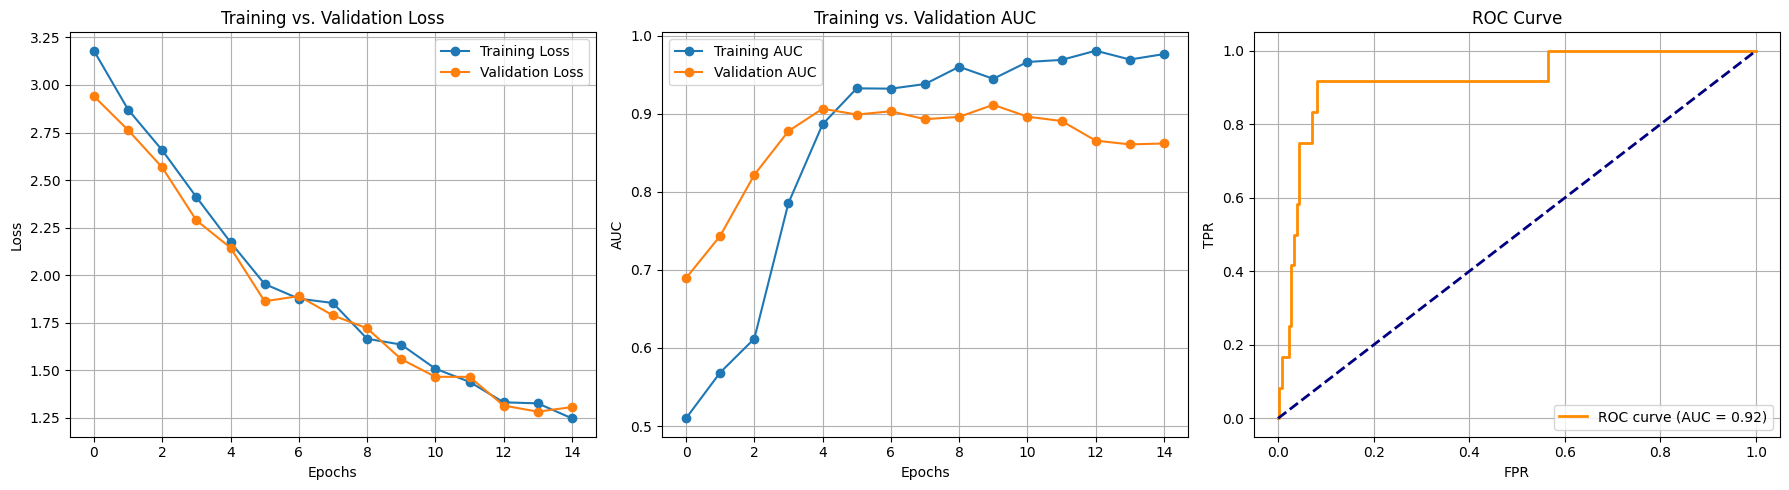

In [21]:
from tensorflow.keras.models import load_model
modeloHiper2 = load_model('modeloHiper2.keras')
plot_history(history, modeloHiper2, X_val, y_val)

In [22]:
generate_submission(modeloHiper2, test_data, scaler, model_name="Modelo 2 nuevo") 

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
   ID  Bankruptcy
0   5    0.004985
1  14    0.695997
2  16    0.009420
3  26    0.098811
4  28    0.007010
Archivo 'Submissions\submission_Modelo 2 nuevo.csv' generado correctamente.
